In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels)=keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
categories=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'hourse', 'ship', 'truck']

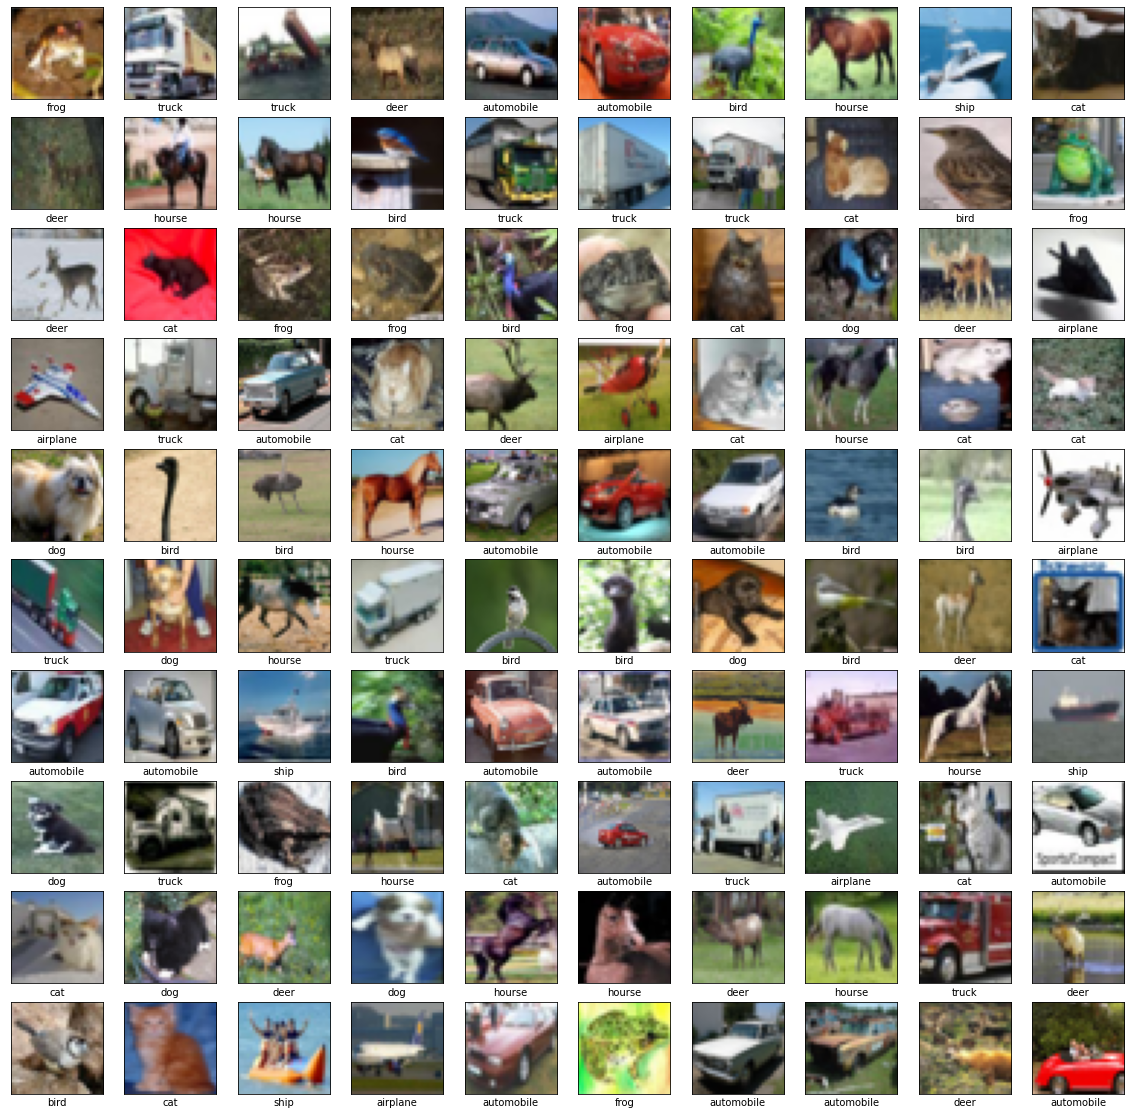

In [3]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.imshow(train_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(categories[train_labels[i][0]])
plt.show()

In [4]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=64, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax'),

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [6]:
train_images_norm=train_images.astype('float32')/255.0
test_images_norm=test_images.astype('float32')/255.0

In [8]:
h=model.fit(x=train_images_norm, y=train_labels,epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 47s 171ms/step - loss: 1.9917 - accuracy: 0.2797 - val_loss: 1.7768 - val_accuracy: 0.3589
Epoch 2/10
274/274 [==============================] - 47s 170ms/step - loss: 1.7037 - accuracy: 0.3793 - val_loss: 1.6365 - val_accuracy: 0.4023
Epoch 3/10
274/274 [==============================] - 47s 171ms/step - loss: 1.5901 - accuracy: 0.4223 - val_loss: 1.5617 - val_accuracy: 0.4265
Epoch 4/10
274/274 [==============================] - 47s 172ms/step - loss: 1.5091 - accuracy: 0.4516 - val_loss: 1.5423 - val_accuracy: 0.4397
Epoch 5/10
274/274 [==============================] - 47s 171ms/step - loss: 1.4547 - accuracy: 0.4748 - val_loss: 1.4526 - val_accuracy: 0.4682
Epoch 6/10
274/274 [==============================] - 47s 171ms/step - loss: 1.4086 - accuracy: 0.4935 - val_loss: 1.4276 - val_accuracy: 0.4861
Epoch 7/10
274/274 [==============================] - 47s 171ms/step - loss: 1.3712 - accuracy: 0.5091 - val_loss: 1.3837 - val_ac

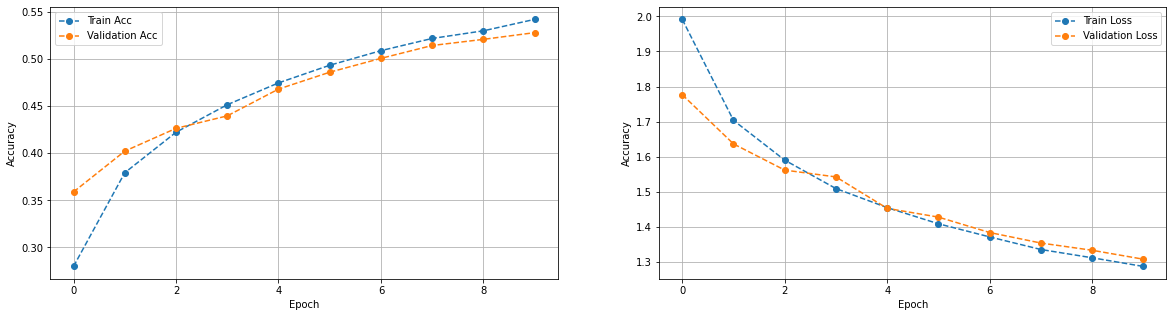

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'--o')
plt.plot(h.history['val_accuracy'],'--o')
plt.legend(['Train Acc','Validation Acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'--o')
plt.plot(h.history['val_loss'],'--o')
plt.legend(['Train Loss','Validation Loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()